# Exploratory & Confirmatory Data Analysis

## Preamble

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [25]:
df = pd.read_csv("movies_cleaned.csv")

We standardise the columns with min-max scaling to make some graphs make more sense, such as when comparing IMDB ratings with Metacritic or Rotten Tomatoes ratings (which use different units).

In [26]:
# Standardise Columns
for column in df.columns:
    if df[column].dtype == 'float64':
        c = df[column]
        df[column] = (c-c.min())/(c.max()-c.min())

In [33]:
from ast import literal_eval

df['genres'] = df['genres'].apply(literal_eval)

In [34]:
df

,release_date,budget,revenue_worldwide,runtime,genres,cast_popularity_mean,cast_popularity_max,director_popularity,original_language,imdb_rating,imdb_votes,mpaa_rating,domestic_box_office,rotten_tomatoes_score,metacritic_score,season
0,2004-06-11,0.000685,0.015774,95,[Comedy],0.035398,0.027694,0.079028,en,0.720000,0.080836,PG,0.047553,0.72,0.580247,Summer
1,2021-02-06,0.059942,0.023942,117,"[Animation, Fantasy, Action]",0.022390,0.014619,0.035171,zh,0.693333,0.001356,TV-14,0.000000,0.80,0.506173,Winter
2,2021-02-12,0.059942,0.028723,115,"[Romance, Comedy, Drama]",0.083942,0.063939,0.011529,en,0.626667,0.011970,TV-14,0.000000,0.79,0.592593,Winter
3,2003-05-30,0.160986,0.321625,100,"[Animation, Family]",0.037234,0.020001,0.074237,en,0.880000,0.381959,G,0.406596,0.99,0.901235,Spring
4,2000-09-01,0.021408,0.013702,140,"[Drama, Crime]",0.049804,0.029024,0.135686,en,0.840000,0.039375,R,0.004467,0.69,0.567901,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2014-12-03,0.239767,0.091675,150,"[Adventure, Drama, Action]",0.116611,0.077311,0.153533,en,0.666667,0.030865,Unknown,0.000000,0.64,0.506173,Winter
2587,2019-08-08,0.083918,0.041249,102,"[Family, Comedy, Adventure]",0.075042,0.079589,0.044788,en,0.666667,0.030865,Unknown,0.000000,0.64,0.506173,Summer
2588,2024-09-04,0.169550,0.154598,105,"[Comedy, Fantasy, Horror]",0.148882,0.108933,0.200220,en,0.666667,0.030865,Unknown,0.000000,0.64,0.506173,Fall
2589,2012-03-01,0.119884,0.119474,86,"[Animation, Family]",0.115472,0.089233,0.034440,en,0.666667,0.030865,Unknown,0.000000,0.64,0.506173,Spring


# Exploration (GRAPHS)

The `revenue_worldwide` and `domestic_box_office` columns record functionally similar data, but the latter had more null values so we use the revenue as the main "target" to be measured.

The graphs show that runtime matters very little to a film's success, and that box office success correlates very strongly with revenue except for the many null values present in this dataset.

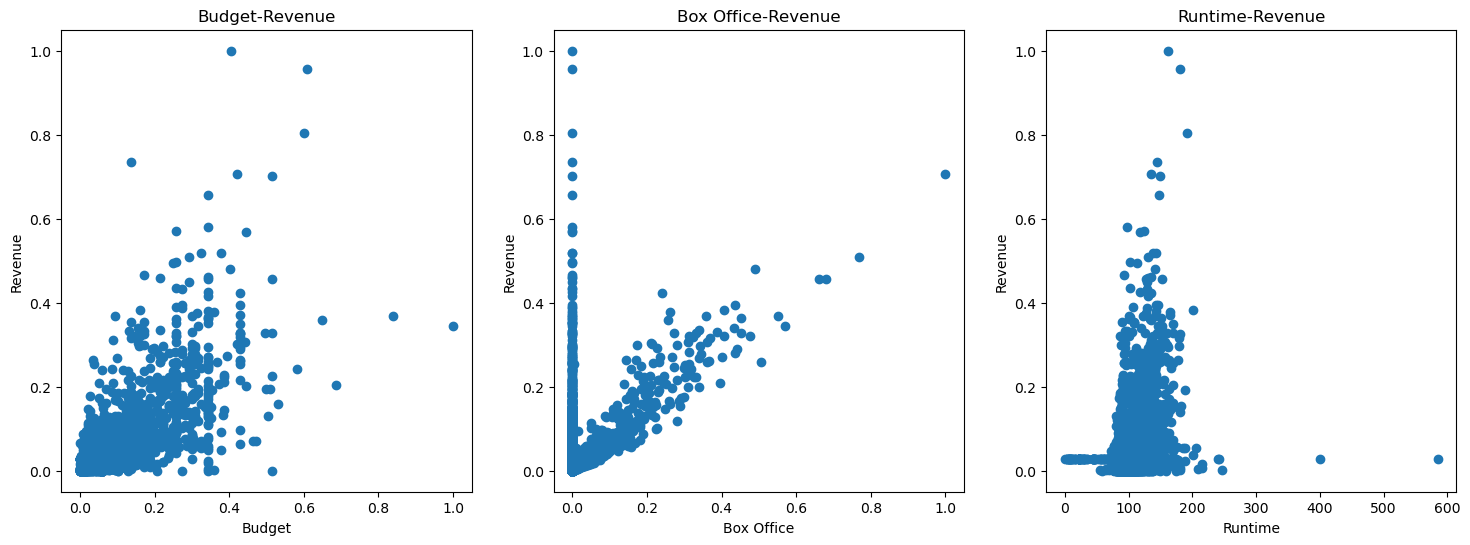

In [5]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df.budget, df.revenue_worldwide)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget-Revenue")

plt.subplot(1, 3, 2)
plt.scatter(df.domestic_box_office, df.revenue_worldwide)
plt.xlabel("Box Office")
plt.ylabel("Revenue")
plt.title("Box Office-Revenue")

plt.subplot(1, 3, 3)
plt.scatter(df.runtime, df.revenue_worldwide)
plt.xlabel("Runtime")
plt.ylabel("Revenue")
plt.title("Runtime-Revenue")
plt.show()

## Popularity Comparisons

Measuring effect of the popularity of cast or director to the success of the movie.  We also compare ratings from different sources (IMDB, Metacritic, Rotten Tomatoes) and how they affect a movie's success.

We see very little correlation in all cases, it seems that ultimately popularity does not have a massive impact.

We also see that on average IMDB and Rotten Tomatoes rate movies higher than Metacritic, though the ratings do not strongly affect performance. 

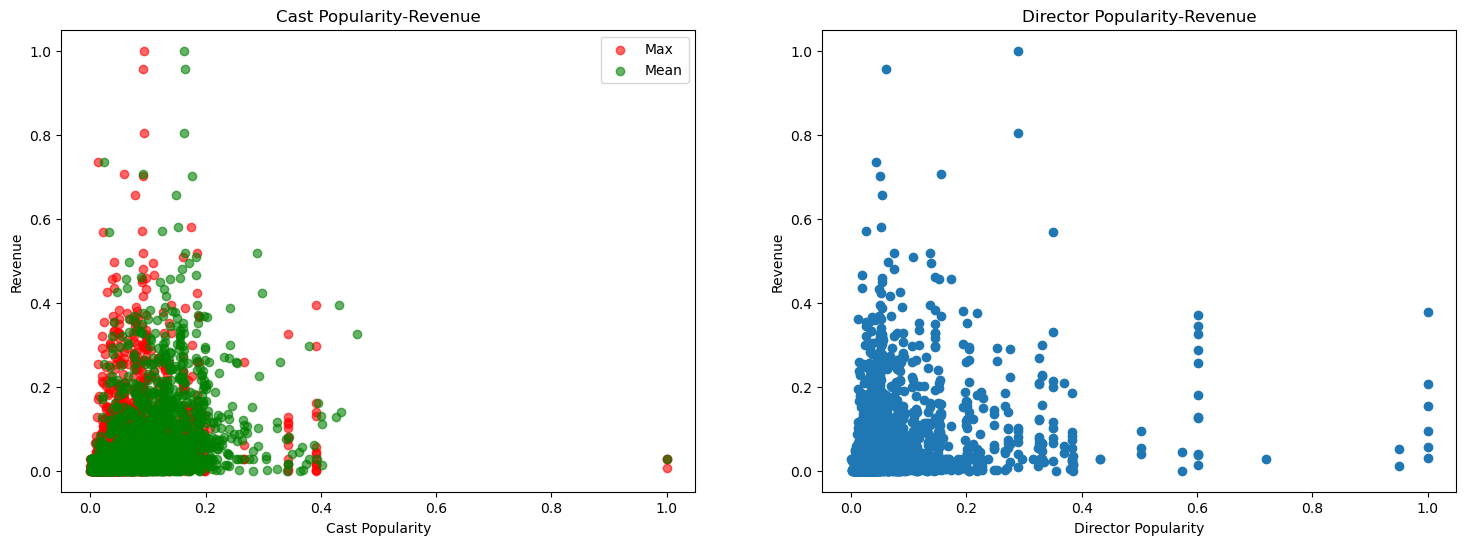

In [6]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(df.cast_popularity_max, df.revenue_worldwide, c='red', alpha=0.6)
plt.scatter(df.cast_popularity_mean, df.revenue_worldwide, c='green', alpha=0.6)
plt.xlabel("Cast Popularity")
plt.ylabel("Revenue")
plt.title("Cast Popularity-Revenue")
plt.legend(["Max", "Mean"])

plt.subplot(1, 2, 2)
plt.scatter(df.director_popularity, df.revenue_worldwide)
plt.xlabel("Director Popularity")
plt.ylabel("Revenue")
plt.title("Director Popularity-Revenue")

plt.show()

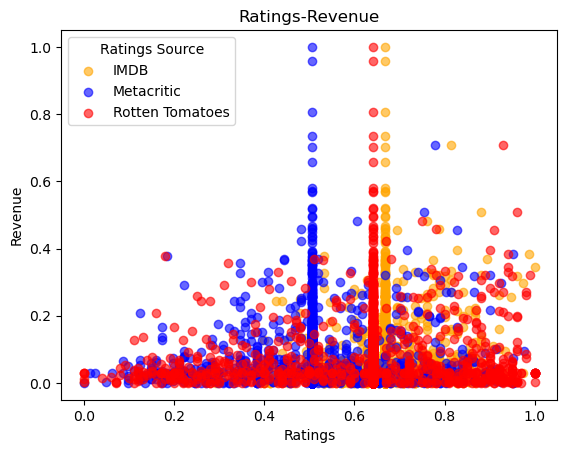

In [9]:
plt.scatter(df.imdb_rating, df.revenue_worldwide, c='orange', alpha=0.6)
plt.scatter(df.metacritic_score, df.revenue_worldwide, c='blue', alpha=0.6)
plt.scatter(df.rotten_tomatoes_score, df.revenue_worldwide, c='red', alpha=0.6)

plt.xlabel("Ratings")
plt.ylabel("Revenue")
plt.title("Ratings-Revenue")
plt.legend(["IMDB", "Metacritic", "Rotten Tomatoes"], title='Ratings Source')

plt.show()

## Other factors

We measure how other factors, like release time and MPAA category, affect revenue.

From here we see that while release season does not significantly affect revenue, a film's MPAA rating does.  On average, movies rated PG or PG-13 (i.e. movies that are "family friendly") generate more revenue than movies rated for higher ages.

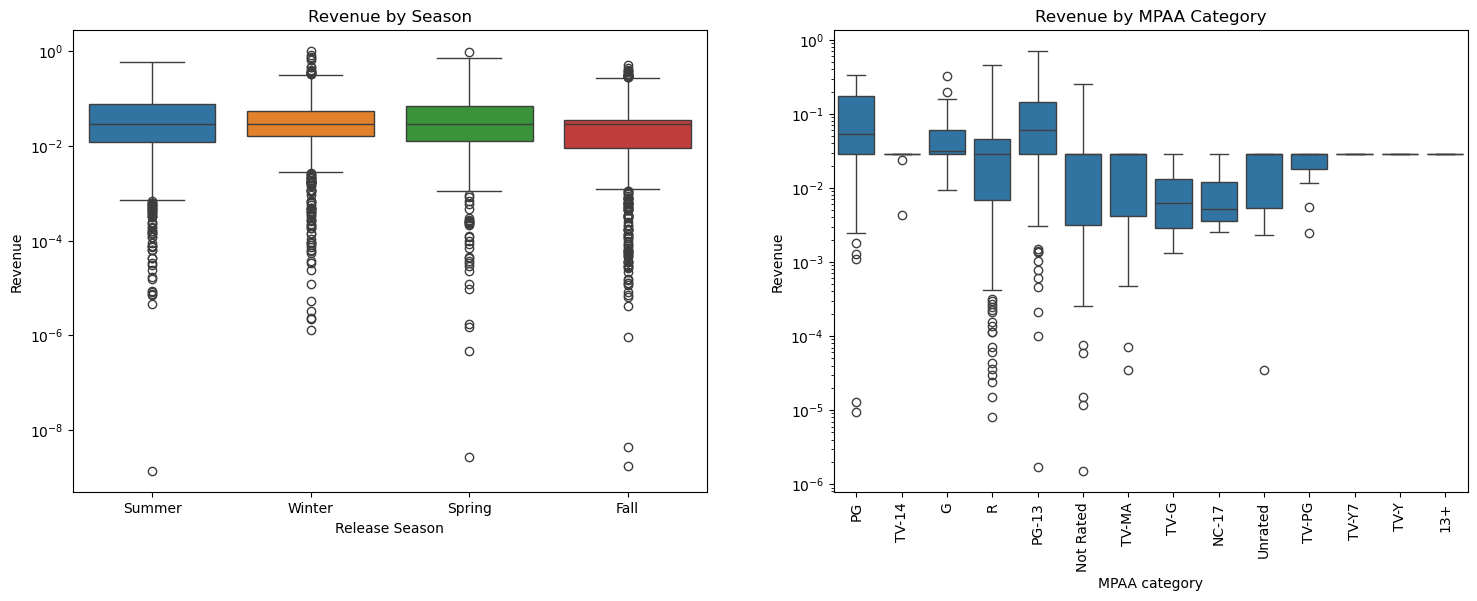

In [12]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.yscale('log')
sb.boxplot(data=df, x='season', y='revenue_worldwide', hue='season')
plt.xlabel("Release Season")
plt.ylabel("Revenue")
plt.title("Revenue by Season")

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.yscale('log')
sb.boxplot(data=df[df.mpaa_rating != "Unknown"], x='mpaa_rating', y='revenue_worldwide')
plt.xlabel("MPAA category")
plt.ylabel("Revenue")
plt.title("Revenue by MPAA Category")

plt.show()

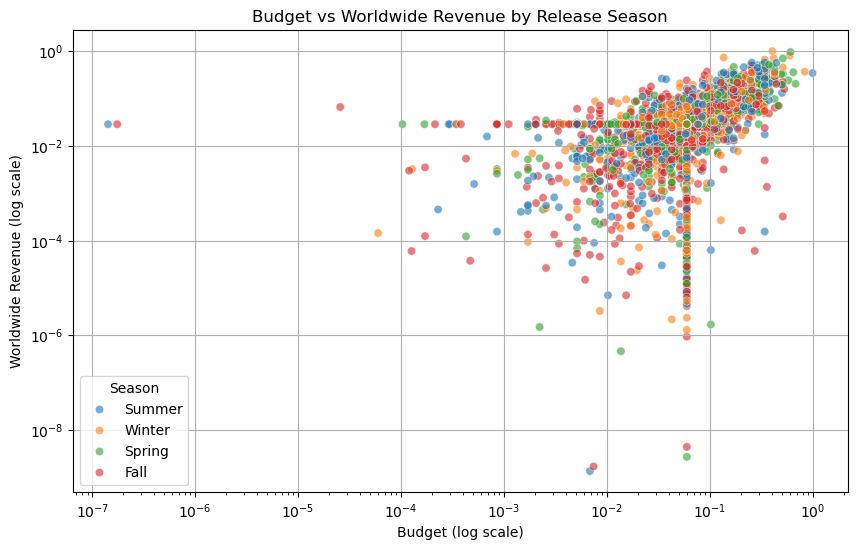

In [48]:
plt.figure(figsize=(10,6))

sb.scatterplot(
    data=df,
    x='budget',
    y='revenue_worldwide',
    hue='season',
    alpha=0.6
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Budget (log scale)')
plt.ylabel('Worldwide Revenue (log scale)')
plt.title('Budget vs Worldwide Revenue by Release Season')
plt.legend(title='Season')
plt.grid(True)
plt.show()

## Genres

We analyse the effects of different genres on movie revenue and reviews.

Action and adventure movies seem to perform slightly better than comedy and drama movies in terms of revenue, although the effect is slight.

The differences in reviews are less clear due to noise in the data.  It seems that Metacritic rates drama movies slightly higher than others, IMDB rates comedy movies slightly lower, and Rotten Tomatoes rates action movies slightly lower as well.

In [42]:
genre_frequencies = {}

for genre_list in df.genres:
    for genre in genre_list:
        genre_frequencies[genre] = 1 + genre_frequencies.get(genre, 0)

genre_counts = pd.DataFrame(sorted(genre_frequencies.items(), key=lambda x: x[1], reverse=True), columns=['Genre', 'Count'])

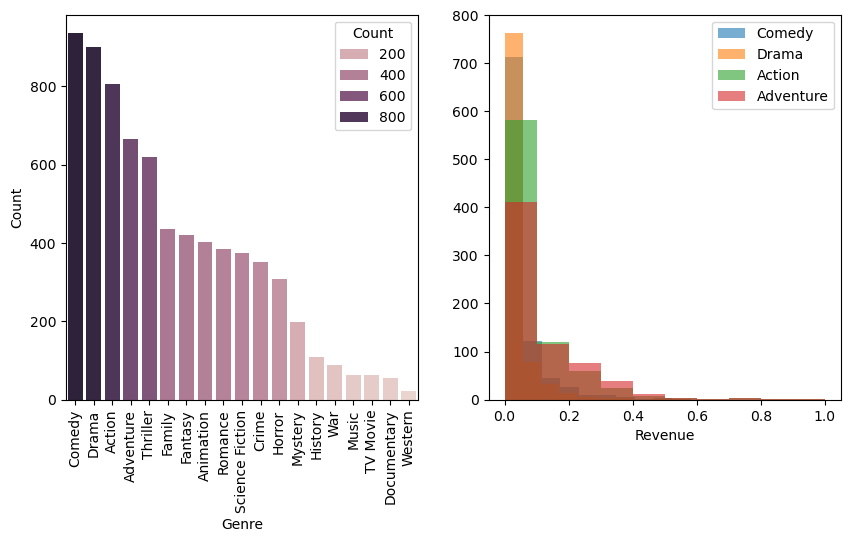

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sb.barplot(data=genre_counts, x='Genre', y='Count', hue='Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
for colour, genre in [('yellow', 'Comedy'), ('blue', 'Drama'), ('red', 'Action'), ('green', 'Adventure')]:
    df_in_genre = df[df.genres.apply(lambda l: genre in l)]
    plt.hist(df_in_genre.revenue_worldwide, alpha=0.6)
plt.legend(['Comedy', 'Drama', 'Action', 'Adventure'])
plt.xlabel('Revenue')

plt.show()

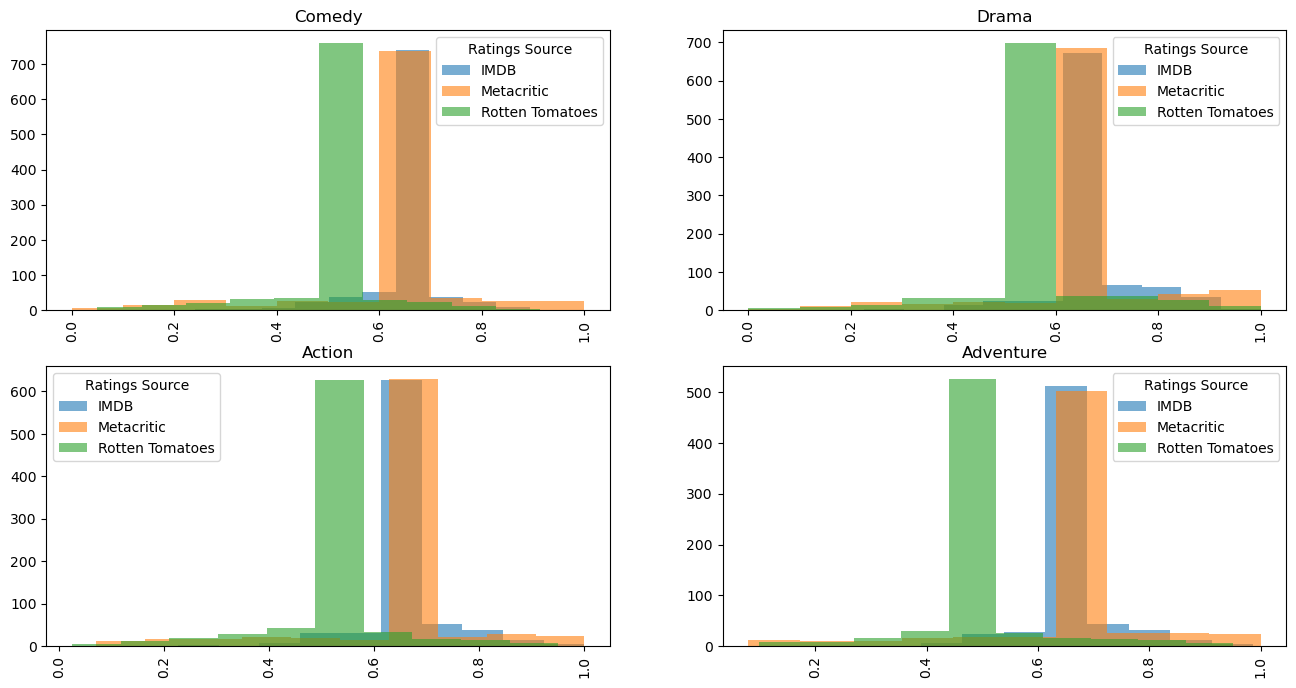

In [82]:
plt.figure(figsize=(16,8))
for i, genre in enumerate(['Comedy', 'Drama', 'Action', 'Adventure']):
    plt.subplot(2, 2, i+1)
    dfg = df[df.genres.apply(lambda l: genre in l)]
    plt.hist(dfg.imdb_rating, alpha=0.6)
    plt.hist(dfg.rotten_tomatoes_score, alpha=0.6)
    plt.hist(dfg.metacritic_score, alpha=0.6)
    plt.xticks(rotation=90)
    plt.title(genre)
    plt.legend(["IMDB", "Metacritic", "Rotten Tomatoes"], title='Ratings Source')

plt.show()

# Correlation

To confirm our hypotheses, we compute a matrix of the correlations between our numerical features.

We find that the only feature with a significant correlation (r>0.5) with a movie's revenue is its budget.  We also see that revenue and box office have a 0.48 correlation; however, this can be explained by the large number of null values in that feature.

The matrix shows that revenue has extremely weak correlation with critic ratings (<0.08) and slightly higher but still very weak correlation with audience ratings (<0.2).  We also see that for the most part the ratings from all sources are similar to each other, having correlations around 0.6-0.8 between each of the three sources (IMDB, Rotten Tomatoes, Metacritic).

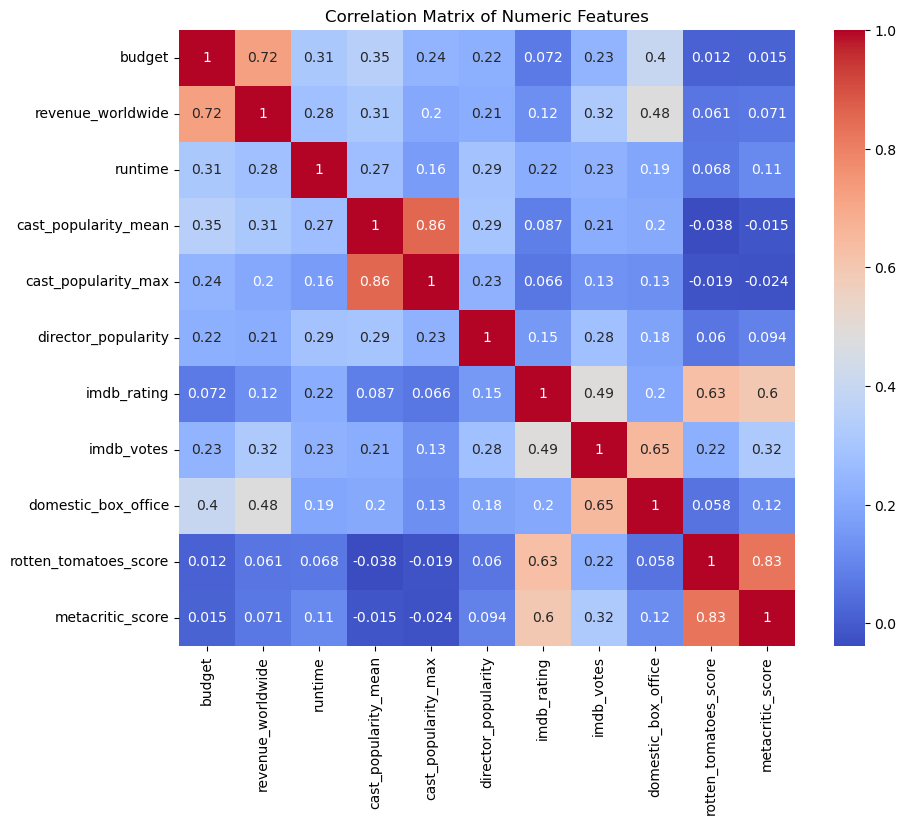

In [22]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include='number') 
corr_matrix = numeric_cols.corr()

sb.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    square=True
)

plt.title('Correlation Matrix of Numeric Features')
plt.show()